In [72]:
import numpy as np
import matplotlib.pyplot as plt 

# Seminar 7 #

## Hydraulic Modelling I

 1. **Analytical and Numerical Models I**




### Problem 1 -  Analytical Solution Saint-Venannant 

A test problem from [MacDonald et al. (1995)](https://www.reading.ac.uk/web/files/maths/02-95.pdf)

A 1 km long rectangular channel of width $B = 10$ m has a discharge of $Q =
20$ m$^3$/s. The flow is subcritical at inflow and is subcritical at outflow with depth 0.748409 m. The Manning roughness coefficient for the channel is 0.033 and Darcy-Weisbach coefficient is 0.093


### Solution of Problem 1

Relevant slide: Lecture 7, slide 11

Required equations:

$$
\hat{h}(x) = \bigg(\frac{4}{g}\bigg)^{1/3} \bigg(1 + \frac{1}{2}\exp\bigg(-16\bigg(\frac{x}{1000}-\frac{1}{2}\bigg)^2\bigg)\bigg)
$$

$$
				\hat{h}^{\prime}(x) = \bigg(\frac{4}{g}\bigg)^{1/3}\frac{2}{125}\bigg(\frac{x}{1000}-\frac{1}{2}\bigg)\exp\bigg(-16\bigg(\frac{x}{1000}-\frac{1}{2}\bigg)^2\bigg)
				$$
                
$$
				So(x) = \bigg(1-\frac{4}{g\hat{h}(x)^3}\bigg)\hat{h}^{\prime}(x)+ \frac{4 n^2}{(\hat{h}(x))^{10/3}}
				$$
                
$$
So(x) = \bigg(1-\frac{4}{g\hat{h}(x)^3}\bigg)\hat{h}^{\prime}(x)+ \frac{4 f}{(8g\hat{h}(x))^{3}}
$$

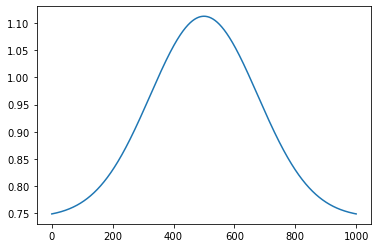

In [73]:
#Solution problem 1(a)
# Given are:
n1 = 0.033 # s/m²,Manning coeff
f1 = 0.093 # - Darcy-Wiesbach coeff.
g1 = 9.8 # m/s^2 gravity

#interim computation
x1 = np.linspace(0,1000, 2000)

# calculation
h_1 = (4/g1)**(1/3)*(1+1/2*(np.exp(-16*(x1/1000-1/2)**2)))
h1_p = -(4/g1)**(1/3)*(2/125)*(x1/1000-1/2)*np.exp(-16*(x1/1000-1/2)**2)
s1_m = (1-(4/(g1*h_1)**3))*h1_p + (4*n1**2)/(h_1)**(10/3)
#output
#print("The resulting diameter is: {0:1.2f}".format(D1_a), "m")
plt.plot(x1, h_1 ) 


### Problem 2 -  Finite Difference Scheme

In [134]:
# Define all your functions

# Define problem function 
def f(x):
    return np.exp(x)

# Define forward difference formula
def fd(f, x, h):
    return (f(x+h)-f(x))/h

# Define backward difference formula
def bd(f, x , h):
    return (f(x) - f(x-h))/h

# Define central difference formula
def cd(f,x, h):
    return (f(x+h)-f(x-h))/(2*h)


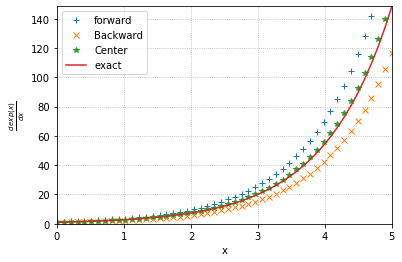

In [140]:
# implement FDM

# define domain (Geometry - a line here)
a = 0 # line start at a
b = 5 # line ends at b
N = 50 # no of division betwee a and b or d

# discretize line in delta_x
dx = np.linspace(a, b, N) # a to b in N steps

# creat variables empty to fill the results

forward = [] # for forward FDM cal.
backward = [] # for backward FDM cal
center = [] # for center FDM cal.

# Main FDM calculation
for x in dx:
    forward.append(fd(f, x, h= 0.5)) # append attaches result for each x to []
    center.append(cd(f,x, h=0.5))
    backward.append(bd(f, x, h=0.5))

# plot results
plt.figure(figsize=(6,4)) # figure size
plt.axis([a, b, 0, np.exp(b)]) # set axis x = a-b and y = 0, exp(b)
plt.plot(dx, forward, '+', label = 'forward')# label required for legend
plt.plot(dx, backward, 'x', label='Backward') # "x" is symbol
plt.plot(dx, center, '*', label="Center" )
plt.plot(dx, np.exp(dx), label='exact') # exact value of the function
plt.legend() # show legend
plt.xlabel(r'x'); plt.ylabel(r'$\frac{d\,exp(x)}{dx}$') # labels
plt.grid(linestyle='dotted') 
plt.savefig('S7-P2.pdf', dpi = 300)


## Model Calibration ## 



In [91]:
import pandas as pd  # for data pandas is a good library

# Make an assessment of model calibration with the following data

data = pd.read_csv("cal_data.csv", ",") # importing data from csv file to dataframe

Qo = data["Observed Discharge, Q_o"]     # extracting data
Qc = data["Calculated Discharge, Q_c"]

data.head(5) # checking imported data

,Observation point,"Observed Discharge, Q_o","Calculated Discharge, Q_c"
0,1,129.28,132.32
1,2,127.05,129.41
2,3,128.06,131.66
3,4,116.15,115.36
4,5,115.20,115.04


In [92]:
 # define the functions
    
#1 The mean of residual error (M)

def M(Qo,Qc):
    N = np.size(Qo) # obtaining number of observation
    M1 = 1/N * np.sum(Qc - Qo)  # applying formula
    return M1 

#2 VAR

def VAR(Qo, Qc): # it is good to change variable names
    N1 = np.size(Qo)
    M2 = M(Qo, Qc) # we reuse the defined M above. Note this has to be in this order
    VAR1 = 1/(N1-1)* np.sum(((Qc-Qo)-M2)**2)
    return VAR1 

#3 MA

def MA(Qo, Qc):
    N2 = np.size(Qc) 
    MA1 = 1/N2 * np.sum (np.abs(Qc-Qo))
    return MA1

#4 RMS
def RMS(Qo, Qc):
    N3 = np.size(Qc) 
    RMS1 = np.sqrt(1/N3 * np.sum((Qc - Qo)**2))
    return RMS1

#5 r

def r(Qo, Qc):
    Qom = np.mean(Qo) # mean of Qo
    Qcm = np.mean(Qc) # mean of Qc
    dm1, dm2 = np.sqrt(np.sum((Qc - Qcm)**2)), np.sqrt(np.sum((Qo-Qom)**2)) # denom. terms of eq.
    r1 = np.sum((Qc - Qcm)*(Qo-Qom))/(dm1*dm2)
    return  r1

In [93]:
# Results
Mr = M(Qo, Qc)
MAr = MA(Qo, Qc)
VARr = VAR(Qo,Qc)
RMSr = RMS(Qo,Qc) 
rr = r(Qo, Qc)


print("The mean of residual error (M) is: {0:1.2}".format(Mr), "\n")  
print("The variance of residual error (VAR) is: {0:1.3}".format(VARr), "\n")  
print("The mean of absolute residual error (MA) is: {0:1.2}".format(MAr), "\n")  
print("The root mean of squared error (RMS) is: {0:0.3}".format(RMSr), "\n" )  

The mean of residual error (M) is: 0.57 

The variance of residual error (VAR) is: 6.78 

The mean of absolute residual error (MA) is: 2.1 

The root mean of squared error (RMS) is: 2.63 



In [94]:
# Relative error
Max_Qo = np.max(Qo) # Highest Qo
Min_Qo = np.min(Qo) # Minimun Qo
f = (Max_Qo - Min_Qo)

Mrel = M(Qo, Qc)/f
MArel = MA(Qo, Qc)/f
VARrel = VAR(Qo,Qc)/f
RMSrel = RMS(Qo,Qc)/f 

print("The relative mean of residual error (M) is: {0:1.2}".format(Mrel), "\n")  
print("The relative variance of residual error (VAR) is: {0:1.3}".format(VARrel), "\n")  
print("The relative mean of absolute residual error (MA) is: {0:1.2}".format(MArel), "\n")  
print("The relative root mean of squared error (RMS) is: {0:0.3}".format(RMSrel), "\n" )  

The relative mean of residual error (M) is: 0.024 

The relative variance of residual error (VAR) is: 0.282 

The relative mean of absolute residual error (MA) is: 0.087 

The relative root mean of squared error (RMS) is: 0.11 



In [95]:
#Qualitative Assessment of Calibration result

# table results

data.describe() 

,Observation point,"Observed Discharge, Q_o","Calculated Discharge, Q_c"
count,40.000000,40.000000,40.000000
mean,20.500000,118.795000,119.367750
std,11.690452,7.191814,7.746667
min,1.000000,106.730000,106.040000
25%,10.750000,111.905000,112.847500
50%,20.500000,118.365000,120.130000
75%,30.250000,124.092500,127.807500
max,40.000000,130.750000,132.320000


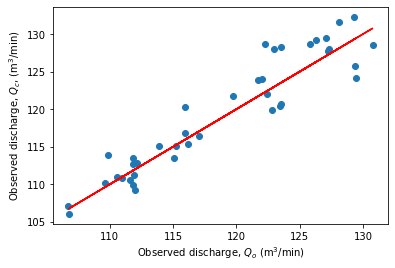

In [129]:
#Qualitative Assessment of Calibration result

# Visual results

plt.scatter(Qo, Qc) 
plt.plot(Qo, Qo, "r")
plt.xlabel(r"Observed discharge, $Q_o$ (m$^3$/min)")
plt.ylabel(r"Observed discharge, $Q_c$, (m$^3$/min)")  
plt.savefig("S7-P4.pdf", dpi = 300)

## Sensitivity Analysis ## 

### Example Problem Sensitivity Analysis ###

Perform the Sensitivity Analysis of the following model:
$$
R = \frac{4 M^2}{\pi^2\alpha_{Tv}} \ln\Bigg(\frac{4}{\pi}\frac{\gamma C_D + C_A
}{C_A}\Bigg) 
$$

In which $R$ is output, and $M$, $\alpha_{Tv}$, $\gamma$, $C_D$ and $C_A$ are parameters.


### Solution 
We will use SYMPY library to obtain differentials for this problem. 

You could also use FDM method to obtain the differentials

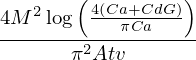

In [118]:
import sympy as sp 
sp.init_printing() 


M, Atv, Cd, Ca, G = sp.symbols('M, Atv, Cd, Ca, G') # defining symbols

# define equation right side

eq = 4*M**2/(sp.pi**2*Atv) * sp.log((4/sp.pi)*(G*Cd + Ca)/Ca) # better to use sp. pi than np.pi
eq  

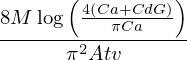

In [120]:
# Step 1- Obtain differentials

dR_dM  = sp.diff(eq, M)  # differential dR/dM
dR_dAtv = sp.diff(eq, Atv) # differential dR/datv - This is for your practice

dR_dM  
#dR_dAtv # remove # and add before dR_dM, toget an equation displayed only one equation can be displayed.
dR_dM

In [121]:
#Step 2 Defining different value of M
#Let Atv = 0.01, Ca = 8, Cd = 5 and G = 3.5

M1 = np.linspace(1,5, 11) # different values of M 
de1 = dR_dM.subs({Atv: 0.01, Ca:8, Cd:5, G:3.5}) 
de2 = de1.evalf(n=5) # evalf gives numerical value, n = 5 is for precision

de3 = sp.lambdify(M, de2) # this converts symbols to function. check de2 = 113.54M
de4 = de3(M1) # This evaluate the function for different values of M.
de2 

In [123]:
#Step 3 Obtaining Pi/R by letting all values fixed
#Let Atv = 0.01, Ca = 8, Cd = 5 and G = 3.5 same as above these parameters are constant
# Let starting M = 1, this is the starting value of parameter

R1 =  eq.subs({M:M1[0], Atv:0.01, Ca:8, Cd:5, G:3.5})  # substituting values in eq to obtain R when M = 1
R2 = R1.evalf(n=5) # we get R from here
Pi_R = R2/M1[0] # We have Pi/R now.
Pi_R 

In [102]:
# Step 4, sensitivity factor calculation
Xm = de4 * Pi_R 

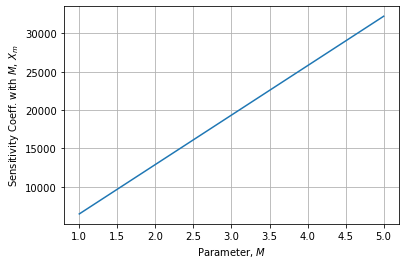

In [130]:
# Step 5, plot the result to see the sensitivity effect.
plt.plot(M1, Xm) 
plt.xlabel(r"Parameter, $M$"), plt.ylabel(r"Sensitivity Coeff. with $M$, $X_m$")
plt.grid()  
plt.savefig("S7-P5.pdf", dpi = 300)